In [3]:
import pandas as pd
import numpy as np

# Task 1: - Load the data using read_csv function from pandas package

In [4]:
df = pd.read_csv('Zomato_reviews.csv')
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Zomato_reviews.csv')

In [5]:
df.head()

,rating,review_text
0,1.0,"Their service is worst, pricing in menu is dif..."
1,5.0,really appreciate their quality and timing . I...
2,4.0,"Went there on a Friday night, the place was su..."
3,4.0,A very decent place serving good food.\r\nOrde...
4,5.0,One of the BEST places for steaks in the city....


In [6]:
df.shape

(27762, 2)

In [7]:
df.isnull().sum()

rating          0
review_text    14
dtype: int64

# Task 2: - Null values in the review text?
### a. Remove the records where the review text is null

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

rating         0
review_text    0
dtype: int64

In [10]:
df['rating'].unique()

array([1. , 5. , 4. , 3. , 2. , 4.5, 1.5, 3.5, 2.5])

# Task 3:- 3. Perform cleanup on the data
### a. Normalize the casing
### b. Remove extra line breaks from the text
### c. Remove stop words
##### i. Note: Terms like ‘no’, ‘not’, ‘don’, ‘won’ are important, don’t remove
### d. Remove punctuation

In [11]:
df['review_text'] = df['review_text'].apply(lambda x: str(x).lower())
df.head()

,rating,review_text
0,1.0,"their service is worst, pricing in menu is dif..."
1,5.0,really appreciate their quality and timing . i...
2,4.0,"went there on a friday night, the place was su..."
3,4.0,a very decent place serving good food.\r\norde...
4,5.0,one of the best places for steaks in the city....


In [12]:
df['review_text'] = df['review_text'].str.replace('\n', ' ',regex=True) 
df.head()

,rating,review_text
0,1.0,"their service is worst, pricing in menu is dif..."
1,5.0,really appreciate their quality and timing . i...
2,4.0,"went there on a friday night, the place was su..."
3,4.0,a very decent place serving good food.\r order...
4,5.0,one of the best places for steaks in the city....


In [13]:
df['review_text'] = df['review_text'].str.replace('\r', ' ',regex=True) 
df.head()

,rating,review_text
0,1.0,"their service is worst, pricing in menu is dif..."
1,5.0,really appreciate their quality and timing . i...
2,4.0,"went there on a friday night, the place was su..."
3,4.0,a very decent place serving good food. ordere...
4,5.0,one of the best places for steaks in the city....


In [14]:
df['review_text'].head(20)

0     their service is worst, pricing in menu is dif...
1     really appreciate their quality and timing . i...
2     went there on a friday night, the place was su...
3     a very decent place serving good food.  ordere...
4     one of the best places for steaks in the city....
5     really lovely place for steaks and sizzlers. t...
6     this place ia for ultimate steak lovers!  both...
7     it's a shame if you haven't tried once upon a ...
8     we visited this place after we were tired and ...
9     went there for yesterday dinner. surprisingly ...
10    great restaurants serving amazing steaks. supe...
11    location - it is on the first floor, next to m...
12    this place is famous for steak. the ambience i...
13    ambience is peaceful with comfortable seating ...
14    we primarily went there to try out their steak...
15    had been there on 31st december for dinner..th...
16    we order chicken starch and the chicken steak....
17    i wonder why it took me so long to discove

In [15]:
import string 

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
df['review_text'] = df['review_text'].str.replace(r'[^\w\s]+', '')

C:\Users\Admin\AppData\Local\Temp/ipykernel_14300/1426673231.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_text'] = df['review_text'].str.replace(r'[^\w\s]+', '')


In [18]:
df.loc[2,'review_text']

'went there on a friday night the place was surprisingly empty interesting menu which is almost fully made of dosas i had bullseye dosa and cheese masala dosa the bullseye dosa was really good with the egg perfectly cooked to a half boiled state the masala in the cheese masala was good but the cheese was a bit too chewy for my liking the chutney was good the sambar was average the dishes are reasonably priced'

In [19]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [20]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['review_text'] = df['review_text'].apply(lambda text: cleaning_stopwords(text))
df.head()

,rating,review_text
0,1.0,service worst pricing menu different bill give...
1,5.0,really appreciate quality timing tried thattil...
2,4.0,went friday night place surprisingly empty int...
3,4.0,decent place serving good food ordered chilli ...
4,5.0,one best places steaks city tried beef steak c...


In [21]:
df.loc[2,'review_text']

'went friday night place surprisingly empty interesting menu almost fully made dosas bullseye dosa cheese masala dosa bullseye dosa really good egg perfectly cooked half boiled state masala cheese masala good but cheese bit chewy liking chutney good sambar average dishes reasonably priced'

# Task 4:- Separation into train and test sets
### a. Use train-test method to divide your data into 2 sets: train and test
### b. Use a 70-30 split

In [48]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

In [22]:
x=df['review_text'].values
y=df['rating'].values

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
x_train.shape

(19423,)

# Task 5:- Use TF-IDF values for the terms as features to get into a vector space model

### a. Import TF-IDF vectorizer from sklearn
### b. Instantiate with a maximum of 5000 terms in your vocabulary
### c. Fit and apply on the train set
### d. Apply on the test set

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectorizer = TfidfVectorizer(max_features=5000)

In [27]:
x_train_vect=vectorizer.fit_transform(x_train)
x_test_vect=vectorizer.transform(x_test)

# Task 6:- Model building: Random Forest Regressor
### a. Instantiate RandomForestRegressor from sklearn (set random seed)
### b. Fit on the train data
### c. Make predictions for the train set

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
model = RandomForestRegressor(random_state=1)

In [30]:
model.fit(x_train_vect,y_train)

RandomForestRegressor(random_state=1)

In [31]:
y_pred=model.predict(x_test_vect)

# Task 7: - Model evaluation
### a. Report the root mean square error

In [38]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [43]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:',r2_score(y_test,y_pred))

Mean Absolute Error: 0.25673587447869384
Mean Squared Error: 0.26985528537249664
Root Mean Squared Error: 0.5194759718913827
R2 Score: 0.8372712626161624


# Task 8:- Hyperparameter tuning
### a. Import GridSearch
### b. Provide the parameter grid to choose:
     i. max_features – ‘auto’, ‘sqrt’, ‘log2’
     ii. max_depth – 10, 15, 20, 25

In [45]:
from sklearn.model_selection import GridSearchCV

In [53]:
def model_fn(reg,grid,cv):
    print('****')
    print(reg)
    print('****')
    model=reg
    model.fit(x_train_vect,y_train)
    y_pred=model.predict(x_test_vect)
    y_pred_train=model.predict(x_train_vect)
    print('Test Data Results:')
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2 Score:',r2_score(y_test,y_pred))
    print('Train Data Results:')
    print('Mean Absolute Error:', mean_absolute_error(y_train, y_pred_train))
    print('Mean Squared Error:', mean_squared_error(y_train, y_pred_train))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print('R2 Score:',r2_score(y_train,y_pred_train))
    gs=GridSearchCV(model,grid,cv=cv,scoring='neg_mean_squared_error',verbose=4,return_train_score=True)
    gs.fit(x_train_vect,y_train)
    print('Best Parameters',gs.best_params_)
    print('Best Score = ', round(gs.best_score_,2))

# Task 9 ,10 and 11: -Find the parameters with the best mean square error in cross-validation
### a. Choose the appropriate scoring as the metric for scoring
### b. Choose stratified 5 fold cross-validation scheme
### c. Fit on the train set

# What are the best parameters?

# Predict and evaluate using the best estimator
### a. Use the best estimator from the grid search to make predictions on the test set
### b. What is the root mean squared error on the test set?

In [54]:
param_grid = {'max_depth': [10, 15, 20, 25], 'max_features': ['auto', 'sqrt' ,'log2']}
cv=KFold(n_splits=5,shuffle=False,)
model_fn(RandomForestRegressor(),param_grid,cv)

****
RandomForestRegressor()
****
Test Data Results:
Mean Absolute Error: 0.2560125222604201
Mean Squared Error: 0.26901385743745126
Root Mean Squared Error: 0.5186654581109593
R2 Score: 0.8377786623703691
Train Data Results:
Mean Absolute Error: 0.10375960031829702
Mean Squared Error: 0.050767896438726076
Root Mean Squared Error: 0.22531732387618594
R2 Score: 0.9691696146357287
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=10, max_features=auto;, score=(train=-0.710, test=-0.804) total time=  34.3s
[CV 2/5] END max_depth=10, max_features=auto;, score=(train=-0.752, test=-0.771) total time=  33.2s
[CV 3/5] END max_depth=10, max_features=auto;, score=(train=-0.731, test=-0.822) total time=  34.8s
[CV 4/5] END max_depth=10, max_features=auto;, score=(train=-0.716, test=-0.742) total time=  34.8s
[CV 5/5] END max_depth=10, max_features=auto;, score=(train=-0.724, test=-0.816) total time=  33.2s
[CV 1/5] END max_depth=10, max_features=sqrt;, score=(tra

In [89]:
df.iloc[566:567,0:]

,rating,review_text
566,4.0,really love ambience but feel yall much better...


In [88]:
df.loc[566,'review_text']

'really love ambience but feel yall much better came looking rating zomato slightly disappointed food beer improve taste prices charged'

In [125]:
def check():
    a=input('write the review... : ')
    sample=model.predict(vectorizer.transform([a]))
    return sample

In [126]:
check()

write the review... : really love ambience but feel yall much better came looking rating zomato slightly disappointed food beer improve taste prices charged


array([3.825])

In [127]:
model1 = RandomForestRegressor(random_state=1,max_depth=25,max_features='auto')

In [128]:
model1.fit(x_train_vect,y_train)

RandomForestRegressor(max_depth=25, random_state=1)

In [129]:
y_pred1=model1.predict(x_test_vect)

In [130]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred1)))
print('R2 Score:',r2_score(y_test,y_pred1))

Mean Absolute Error: 0.4564360045618339
Mean Squared Error: 0.47746900529479175
Root Mean Squared Error: 0.6909913207087277
R2 Score: 0.7120755731565995


# Task 12:- Can you identify mismatch cases?

### a. Make a rule based on the predicted value and the actual value that identifies mismatch cases (e.g. difference in actual and predicted being more than a cutoff)

### b. How many such cases do you see?

### c. Are all these mismatch cases genuine?

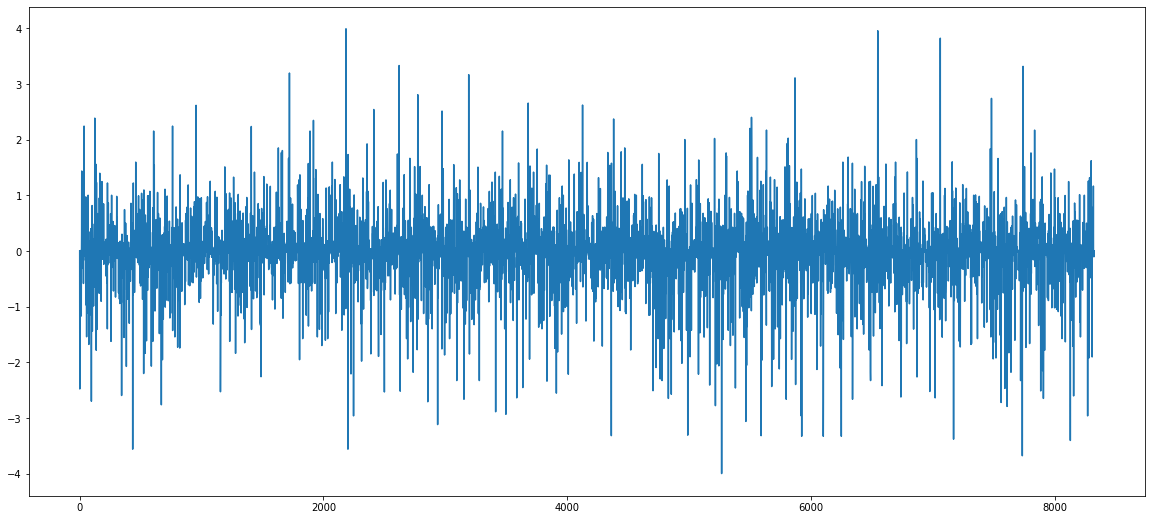

In [138]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,9));
plt.plot(y_test-y_pred);

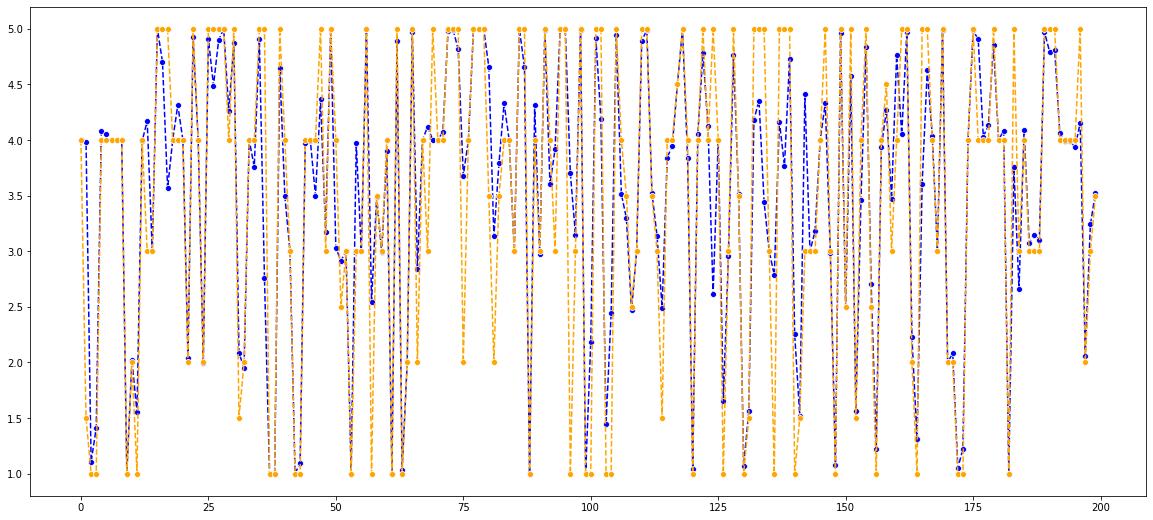

In [103]:
import seaborn as sns
plt.figure(figsize=(20,9))
sns.lineplot(x=range(len(y_pred))[0:200],y=y_pred[0:200],color='blue', marker='o',linestyle='dashed')
sns.lineplot(x=range(len(y_pred))[0:200],y=y_test[0:200],color='orange', marker='o',linestyle='dashed');

In [112]:
len(resd)

8325

In [113]:
resd

array([ 0.   , -2.48 , -0.105, ..., -0.105,  0.   ,  0.   ])